> Игорь Сорочан DSU-31
# Домашнее задание `"Продвинутая линейная алгебра".`

## Уровень 0:


### Задание 1

Дан объект в $2D$ пространстве

In [7]:
import numpy as np
import matplotlib.pyplot as plt


## Линейные отображения:
* поворот - умножение на **ортогогональную** матрицу
* растяжение - умножение на **диагональную** матрицу
* масштабирование и поворот - умножение на **симметричную** матрицу

In [8]:
def print_lintransf(matr):
    x = matr[:,0]
    y = matr[:,1]
    plt.plot(x,y)
    plt.xlim([-200,200])
    plt.ylim([-200,200])

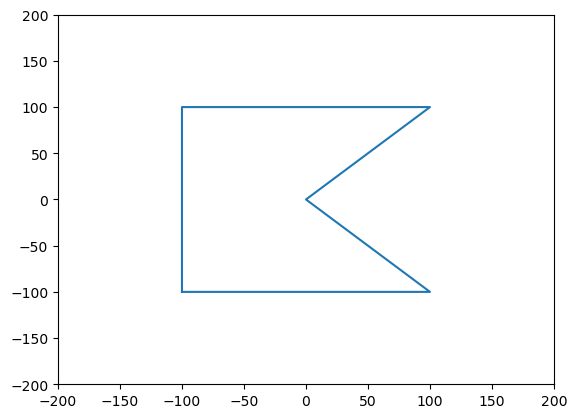

In [9]:
A = [
[-100, -100, 1],
[-100, 100, 1],
[100, 100, 1],
[0, 0, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)
print_lintransf(A)

При помощи линейных отображений:
- Уменьшить объект в два раза
- Повернуть на 130 градусов
- Отразить объект относительно прямой y=x (поможет матрица `[[0, 1, 0], [1, 0, 0], [0, 0, 1]]`)


In [10]:
### YOUR CODE HERE
B = np.array([[0.5,0,0],[0,0.5,0],[0,0,0.5]])
B.shape, A.shape

((3, 3), (6, 3))

In [11]:
(B.shape,A.transpose().shape)

((3, 3), (3, 6))

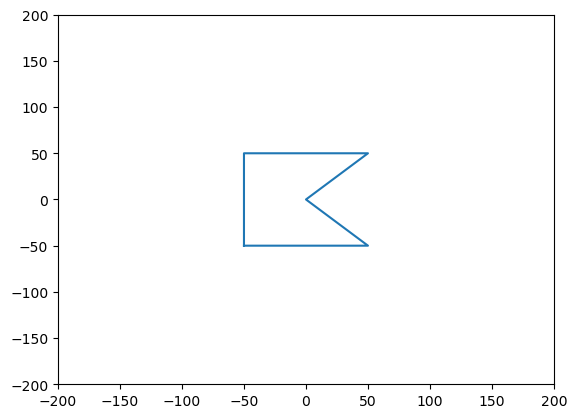

In [12]:
print_lintransf((B@A.transpose()).transpose())

In [13]:
def rotat_matrix(deg):
    s = np.sin(deg*np.pi / 180)
    c = np.cos(deg*np.pi / 180)
    return np.array([[c,-s,0],[s,c,0],[0,0,1]])
    # np.linalg.det(B)    

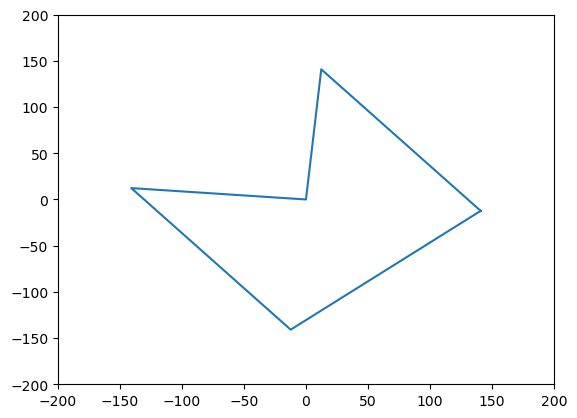

In [14]:
print_lintransf( (rotat_matrix(130)@A.transpose()).transpose()  )

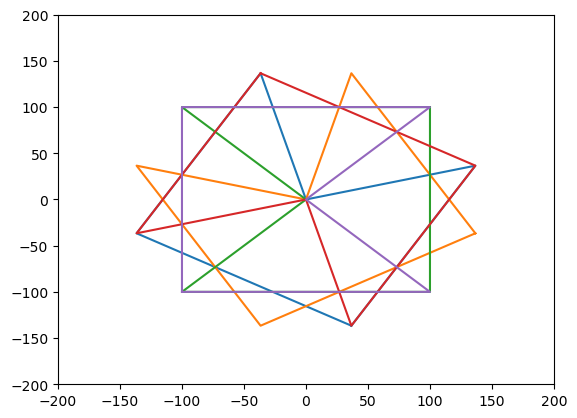

In [15]:
for i in [60,120,180,240,360]:
    print_lintransf( (rotat_matrix(i)@A.transpose()).transpose()  )

[[0 1 0]
 [1 0 0]
 [0 0 1]]


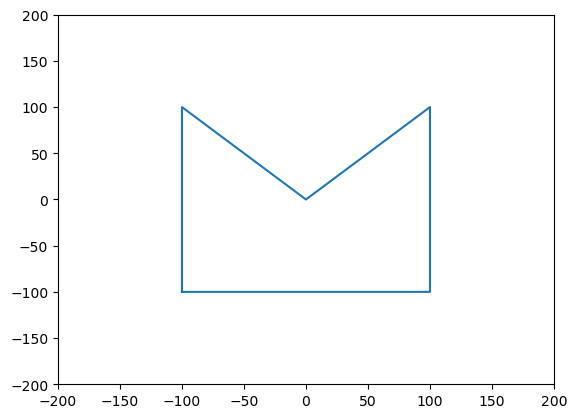

In [16]:
B= np.array([[0, 1, 0], [1, 0, 0], [0, 0, 1]])
print(B)
print_lintransf( (B@A.transpose()).transpose()  )

## Уровень 1:

### Задание 2

Найдите спектральное разложение матрицы:
```
m = np.array([[1, 2],
              [2, 3]])
print(m)
```



In [17]:
### YOUR CODE HERE
m = np.array([[1, 2],
              [2, 3]])
m

array([[1, 2],
       [2, 3]])

`Spectral decomposition of a symmetrical matrix `  
$ A = ( Q\cdot dM \cdot Q^{T})$,  where:  
* $Q$ consists of the `eigenvectors` of $A$ and  
* the diagonal elements of $dM$ are corresponding `eigenvalues`.

In [18]:
Eigenvalues, Eigenvectors = np.linalg.eig(m)
# print(np.linalg.eig(m))
Lambda = np.diag(Eigenvalues)

print(f' matrix Q (eigenvectors):\n {Eigenvectors}\n')
print(f' matrix dM (eigenvalues):\n {Lambda}\n')
print(f' matrix Qinv (eigenvalues):\n {np.linalg.inv(Eigenvectors)}\n')

 matrix Q (eigenvectors):
 [[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]

 matrix dM (eigenvalues):
 [[-0.23606798  0.        ]
 [ 0.          4.23606798]]

 matrix Qinv (eigenvalues):
 [[-0.85065081  0.52573111]
 [-0.52573111 -0.85065081]]



In [19]:
# test 
np.allclose(Eigenvectors @ Lambda @ np.linalg.inv(Eigenvectors) , m, rtol= 1e-6)

True